In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
#The dataset contains no header for columns, hence the header parameter
data1_abnor=pd.read_csv('./ptbdb_abnormal.csv',header=None)
data1_nor=pd.read_csv('./ptbdb_normal.csv',header=None)
data2_train=pd.read_csv('./mitbih_train.csv',header=None)
data2_test=pd.read_csv('./mitbih_test.csv',header=None)

In [4]:
data1 = pd.concat([data1_abnor, data1_nor]).sample(frac=1).reset_index(drop=True)
data2 = pd.concat([data2_train, data2_test]).sample(frac=1).reset_index(drop=True)

In [5]:
data2.loc[(data2[187] != 0),187]=1

In [6]:
data = pd.concat([data1,data2]).sample(frac=1).reset_index(drop=True)

In [7]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [8]:
random_seeed=42
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.25,random_state=random_seeed)
print(x_train.shape)

(30999, 186)


In [9]:
print(len(Y[Y[187] == 0 ]))
print(len(Y[Y[187] == 1 ]))

94635
29363


In [10]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [11]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [12]:
model=tf.keras.Sequential([
    layers.Conv1D(64, 7, activation='relu', input_shape=(186, 1),padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(32, 5, activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool1D(7),
    layers.Conv1D(16, 5, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(5),
    layers.GlobalMaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid') #softmax cuz categories
])

In [14]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=256,epochs=50,verbose=True,validation_split=0.2)

Epoch 1/50
97/97 [==============================] - 16s 150ms/step - loss: 0.1816 - accuracy: 0.9358 - val_loss: 0.1733 - val_accuracy: 0.9366
Epoch 2/50
97/97 [==============================] - 14s 147ms/step - loss: 0.1622 - accuracy: 0.9444 - val_loss: 0.1524 - val_accuracy: 0.9440
Epoch 3/50
97/97 [==============================] - 15s 150ms/step - loss: 0.1529 - accuracy: 0.9473 - val_loss: 0.1629 - val_accuracy: 0.9421
Epoch 4/50
97/97 [==============================] - 15s 152ms/step - loss: 0.1470 - accuracy: 0.9485 - val_loss: 0.1351 - val_accuracy: 0.9540
Epoch 5/50
97/97 [==============================] - 14s 148ms/step - loss: 0.1394 - accuracy: 0.9531 - val_loss: 0.1399 - val_accuracy: 0.9508
Epoch 6/50
97/97 [==============================] - 14s 147ms/step - loss: 0.1293 - accuracy: 0.9563 - val_loss: 0.1364 - val_accuracy: 0.9539
Epoch 7/50
97/97 [==============================] - 14s 148ms/step - loss: 0.1257 - accuracy: 0.9580 - val_loss: 0.1387 - val_accuracy: 0.9511

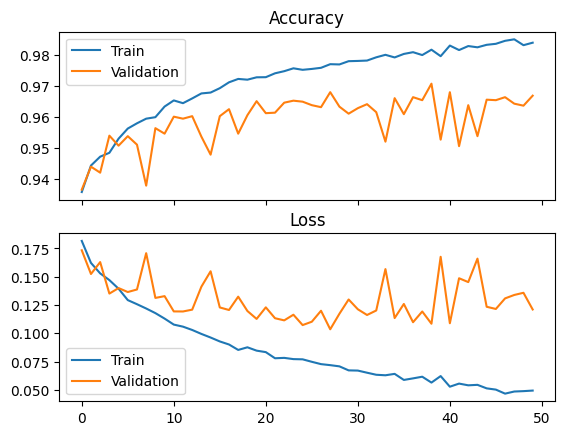

In [15]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [16]:
model.evaluate(x_test, y_test, verbose=True)

2907/2907 [==============================] - 15s 5ms/step - loss: 0.1299 - accuracy: 0.9633


[0.12991656363010406, 0.9633329510688782]